In [278]:
import pandas as pd
import glob
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

ImportError: cannot import name '_safe_split'

In [279]:
def import_folder(folder):
    filenames = glob.glob("data/" + folder + "/*.tsd")

    files = [file.split('\\')[1].split('.')[0] for file in filenames]

    signs = pd.DataFrame()
    for filename in files:
        df = pd.read_table('data/' + folder +'/' + filename + '.tsd', header=None)
        label = filename.split('-')[0]
        ID = filename.rsplit('-', 1)[1]
        df['label'] = label
        df['ID'] = int(ID)
        df.columns = ['x_L','y_L','z_L','roll_L','pitch_L','yaw_L','thumb_L','fore_L','middle_L','ring_L','little_L','x_R','y_R','z_R','roll_R','pitch_R','yaw_R','thumb_R','fore_R','middle_R','ring_R','little_R', 'label', 'ID']
        signs = signs.append(df)
        
    return signs


In [195]:
def temporal_scale(signs):
    IDs = signs['ID'].drop_duplicates().values
    labels = signs['label'].drop_duplicates().values
    signs_new = pd.DataFrame(columns = signs.columns)
    for ID in IDs:
        for sign in labels:

            df = signs[(signs['ID'] == ID) & (signs['label'] == sign)]

            df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']]

            df_new = pd.DataFrame(index=np.arange(57), columns = df.columns)

            for column in df:    
                column_resample = np.fft.irfft(np.fft.rfft(df[column]), 57)
                df_new[column] = column_resample

            df_new['label'] = sign
            df_new['ID'] = ID
            df_new['folder'] = folder
            signs_new = signs_new.append(df_new)
            #original = signs_new[['x_L', 'y_L', 'z_L', 'x_R', 'y_R', 'z_R']]
            #scaled = (original - original.min())/(original.max() - original.min())
            #signs_new[['x_L', 'y_L', 'z_L', 'x_R', 'y_R', 'z_R']] = scaled
    return signs_new
    

In [196]:
root='data'
signs_all = pd.DataFrame()
signs_all_ts = pd.DataFrame()
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
for folder in dirlist:
    print(folder)
    signs = import_folder(folder)
    signs_ts = temporal_scale(signs)
    signs_all = signs_all.append(signs)
    signs_all_ts = signs_all_ts.append(signs_ts)

tctodd1
tctodd2
tctodd3
tctodd4
tctodd5
tctodd6
tctodd7
tctodd8
tctodd9


In [230]:
folder = 'tctodd1'
ID = 1
sign = 'alive'


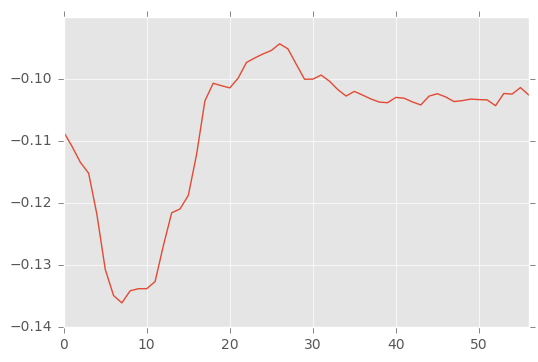

In [198]:
df['x_L'].plot()

C:\Users\anura\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [232]:
def flatten(df):
    df2 = df
    df['frame'] = df.index + 1
    var = ['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']
    df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R', 'label', 'frame']]
    df = df.pivot(columns = 'frame', index = 'label').reset_index()
    df.columns = [[str(e[0]) + str(e[1]) for e in df.columns.values.tolist()]]
    df['ID'] = df2['ID']
    df['folder'] = df2['folder']
    del df2
    return df

In [236]:
signs_flat = pd.DataFrame()
for folder in dirlist:
    for ID in IDs:
        for sign in labels:
            print(ID, sign, folder)
            df = signs_all_ts[(signs_all_ts['ID'] == ID) & (signs_all_ts['label'] == sign) & (signs_all_ts['folder'] == folder)]
            signs_flat = signs_flat.append(flatten(df))

1 alive tctodd1
1 all tctodd1


C:\Users\anura\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


1 answer tctodd1
1 boy tctodd1
1 building tctodd1
1 buy tctodd1
1 change_mind_ tctodd1
1 cold tctodd1
1 come tctodd1
1 computer_PC_ tctodd1
1 cost tctodd1
1 crazy tctodd1
1 danger tctodd1
1 deaf tctodd1
1 different tctodd1
1 draw tctodd1
1 drink tctodd1
1 eat tctodd1
1 exit tctodd1
1 flash tctodd1
1 forget tctodd1
1 girl tctodd1
1 give tctodd1
1 glove tctodd1
1 go tctodd1
1 God tctodd1
1 happy tctodd1
1 head tctodd1
1 hear tctodd1
1 hello tctodd1
1 his_hers tctodd1
1 hot tctodd1
1 how tctodd1
1 hurry tctodd1
1 hurt tctodd1
1 I tctodd1
1 innocent tctodd1
1 is_true_ tctodd1
1 joke tctodd1
1 juice tctodd1
1 know tctodd1
1 later tctodd1
1 lose tctodd1
1 love tctodd1
1 make tctodd1
1 man tctodd1
1 maybe tctodd1
1 mine tctodd1
1 money tctodd1
1 more tctodd1
1 name tctodd1
1 no tctodd1
1 Norway tctodd1
1 not tctodd1
1 paper tctodd1
1 pen tctodd1
1 please tctodd1
1 polite tctodd1
1 question tctodd1
1 read tctodd1
1 ready tctodd1
1 research tctodd1
1 responsible tctodd1
1 right tctodd1
1 sad tc

,ID,folder,fore_L1,fore_L10,fore_L11,fore_L12,fore_L13,fore_L14,fore_L15,fore_L16,...,z_R52,z_R53,z_R54,z_R55,z_R56,z_R57,z_R6,z_R7,z_R8,z_R9
0,1.0,tctodd1,3.507470e-02,2.888556e-03,1.248671e-02,1.755758e-02,1.438340e-02,9.732387e-03,1.162745e-02,1.506117e-02,...,0.003290,-0.000097,0.003122,0.001192,0.004100,0.001781,0.114482,0.068755,0.029946,0.054653
0,1.0,tctodd1,1.047991e-02,1.962489e-02,3.178795e-02,3.974623e-02,4.366870e-02,4.912068e-02,5.196587e-02,4.467303e-02,...,-0.008486,-0.008672,-0.008162,-0.008501,-0.008917,-0.008166,-0.212868,-0.237275,-0.216860,-0.164582
0,1.0,tctodd1,2.289398e-01,1.089710e+00,1.084585e+00,1.092367e+00,1.080822e+00,1.098455e+00,1.069065e+00,1.128868e+00,...,-0.046039,-0.044744,-0.044232,-0.041629,-0.045013,-0.044093,0.100942,0.113385,0.063589,-0.009982
0,1.0,tctodd1,5.119614e-02,2.701419e-02,2.078903e-02,3.030439e-02,2.947683e-02,3.011796e-02,2.991292e-02,2.805684e-02,...,-0.068772,-0.065889,-0.068437,-0.065503,-0.069751,-0.064823,0.143884,0.161429,0.139829,0.123353
0,1.0,tctodd1,5.602339e-02,2.140258e-01,5.228006e-01,9.659331e-01,6.941850e-01,3.340363e-01,2.596844e-01,2.241408e-01,...,0.000097,0.000847,-0.003912,-0.002249,-0.005493,-0.001332,-0.061935,-0.081762,-0.057542,-0.086377
0,1.0,tctodd1,6.434386e-04,2.012085e-02,1.915952e-02,1.316210e-02,1.633990e-03,1.247796e-02,1.537083e-02,-3.361528e-03,...,-0.043818,-0.042885,-0.043413,-0.043624,-0.043707,-0.043445,-0.065687,-0.064017,-0.058626,-0.066193
0,1.0,tctodd1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.009205,-0.010772,-0.009618,-0.009805,-0.008953,-0.008538,0.059827,0.081631,0.156303,0.168927
0,1.0,tctodd1,1.171672e+00,1.428776e+00,1.375307e+00,1.436716e+00,1.362126e+00,1.437651e+00,4.779017e-01,-7.146885e-02,...,-0.081745,-0.085810,-0.079920,-0.088530,-0.078816,-0.095343,0.227759,0.191238,0.202215,0.192107
0,1.0,tctodd1,1.548596e-03,1.440104e-03,-2.446905e-04,1.511797e-04,-1.317024e-04,1.354988e-04,-1.511153e-04,1.745212e-04,...,-0.005054,-0.008367,-0.005651,-0.009098,-0.004409,-0.010148,-0.212464,-0.204564,-0.147249,-0.047366
0,1.0,tctodd1,1.283534e-01,6.232310e-02,2.468620e-02,1.370890e-02,5.059890e-02,9.794307e-02,1.135795e-01,1.289836e-01,...,-0.023777,-0.023332,-0.022362,-0.025360,-0.020360,-0.030723,0.105299,0.155827,0.115091,0.099130


In [261]:
X = signs_flat[signs_flat.columns[2:]]
del X['label']
Y = signs_flat['label']
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

lin_clf = LinearSVC()
lin_clf.fit(X_train, y_train) 


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [271]:
Predicted = lin_clf.predict(X_test)

In [272]:
sum(Predicted == y_test)/len(Y)

1.0

In [94]:
signs_new = temporal_scale(signs)

In [95]:
len(signs_new)

16245

In [90]:
len(labels)

95

In [114]:
len(signs_all)

146949

In [115]:
len(signs_all_ts)

146205

In [ ]:
t